In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [21]:
data = pd.read_excel('data_DP.xlsx')
data.drop(axis=1, inplace=True, columns=['-logC','MaxWaveLength'])
data

,Concentration,320,321,322,323,324,325,326,327,328,...,994,995,996,997,998,999,1000,MaxPeakAbs,time,Integral
0,5,0.387,0.390,0.398,0.406,0.416,0.428,0.440,0.446,0.453,...,0.183,0.182,0.181,0.179,0.178,0.177,0.176,0.849,3.0,371.98
1,10,0.380,0.386,0.394,0.401,0.411,0.423,0.434,0.437,0.444,...,0.290,0.288,0.286,0.283,0.281,0.279,0.277,0.832,3.0,425.36
2,15,0.375,0.380,0.389,0.395,0.406,0.417,0.427,0.432,0.437,...,0.354,0.352,0.349,0.346,0.344,0.341,0.339,0.796,3.0,421.06
3,20,0.303,0.311,0.319,0.326,0.337,0.349,0.362,0.366,0.373,...,0.354,0.351,0.348,0.346,0.344,0.341,0.339,0.799,3.0,417.11
4,25,0.306,0.313,0.322,0.329,0.341,0.353,0.365,0.369,0.376,...,0.363,0.360,0.357,0.354,0.352,0.350,0.347,0.825,3.0,425.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,220,0.237,0.240,0.248,0.255,0.266,0.278,0.296,0.302,0.316,...,0.354,0.351,0.347,0.344,0.341,0.338,0.336,NaN,NaN,NaN
195,240,0.245,0.250,0.259,0.264,0.278,0.292,0.309,0.317,0.330,...,0.341,0.338,0.334,0.331,0.328,0.325,0.323,NaN,NaN,NaN
196,260,0.262,0.266,0.275,0.283,0.296,0.311,0.328,0.334,0.348,...,0.310,0.308,0.304,0.301,0.298,0.295,0.293,NaN,NaN,NaN
197,280,0.260,0.266,0.274,0.282,0.296,0.309,0.328,0.336,0.349,...,0.297,0.294,0.290,0.288,0.285,0.282,0.280,NaN,NaN,NaN


In [22]:
X = data.iloc[:,1:-3]
X.columns = X.columns.astype(str)
y = data.iloc[:,0]
X.shape

(199, 681)

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
st = StandardScaler()
X = st.fit_transform(X)
y = st.fit_transform(np.array(y).reshape(-1,1))
X.shape

(199, 681)

In [19]:
from sklearn.ensemble import IsolationForest
print(X.shape,y.shape)
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(X)
mask = yhat != -1
X, y = X[mask, :], y[mask]
print(X.shape, y.shape)

(199, 681) (199,)


/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


InvalidIndexError: (array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True]), slice(None, None, None))

In [131]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, random_state=2, test_size= 0.2)
# X_train.shape

In [13]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

fs_mut = SelectKBest(score_func=mutual_info_regression, k='all')
fs_mut.fit(X, y)
X_train_fs_m_info = fs_mut.transform(X)

fs_f = SelectKBest(score_func=f_regression, k='all')
fs_f.fit(X, y)
X_train_fs_f_reg = fs_f.transform(X)


/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


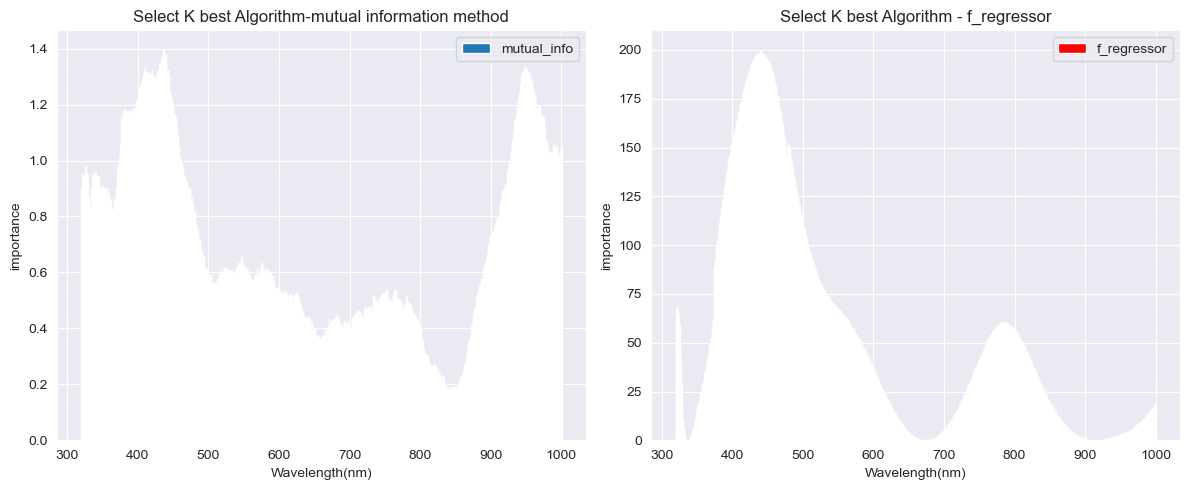

In [14]:
plt.figure(figsize=(12, 5)) 


plt.subplot(1, 2, 1)
plt.bar([i + 320 for i in range(len(fs_mut.scores_))], fs_mut.scores_, label='mutual_info')
plt.title('Select K best Algorithm-mutual information method')
plt.xlabel('Wavelength(nm)')
plt.ylabel('importance')
plt.legend()

plt.subplot(1, 2, 2) 
plt.bar([i + 320 for i in range(len(fs_f.scores_))], fs_f.scores_, label='f_regressor', color='red')
plt.title('Select K best Algorithm - f_regressor')
plt.xlabel('Wavelength(nm)')
plt.ylabel('importance')
plt.legend()

plt.tight_layout()

plt.show()

In [7]:
y = np.reshape(y, (y.shape[0],))

y.shape

(189,)

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import RepeatedKFold, cross_validate
num_features = [i for i in range(5, X.shape[1],5)]
mean_r2_mut_train = []
mean_rmse_mut_train = []
mean_r2_f_train = []
mean_rmse_f_train = []
mean_r2_mut_test = []
mean_rmse_mut_test = []
mean_r2_f_test = []
mean_rmse_f_test = []
cv_lasso = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=3)
for i in num_features:
    model = LassoLarsCV(cv=cv_lasso,n_jobs=-1)
    fs_mut = SelectKBest(score_func=mutual_info_regression, k=i)
    pipeline = Pipeline(steps=[('SelectKbest',fs_mut), ('Linear_model', model)])
    scores_mut = cross_validate(pipeline, X, y, scoring=['r2','neg_root_mean_squared_error'], cv=cv, n_jobs=-1, return_train_score=True)
    mean_r2_mut_train.append(np.mean(scores_mut['train_r2']))
    mean_rmse_mut_train.append((-1) * np.mean(scores_mut['train_neg_root_mean_squared_error']))
    mean_r2_mut_test.append(np.mean(scores_mut['test_r2']))
    mean_rmse_mut_test.append((-1) * np.mean(scores_mut['test_neg_root_mean_squared_error']))
    print('Train: >%d %.3f (%.3f)' % (i, np.mean(scores_mut['train_r2']), np.std(scores_mut['train_r2'])))
    print('Test:  >%d %.3f (%.3f)' % (i, np.mean(scores_mut['test_r2']), np.std(scores_mut['test_r2'])))

for i in num_features:
    model = LassoLarsCV(cv=cv_lasso,n_jobs=-1)
    fs_f = SelectKBest(score_func=f_regression, k=i)
    pipeline = Pipeline(steps=[('SelectKbest',fs_f), ('Linear_model', model)])
    scores_f = cross_validate(pipeline, X, y, scoring=['r2','neg_root_mean_squared_error'], cv=cv, n_jobs=-1, return_train_score=True)
    mean_r2_f_train.append(np.mean(scores_f['train_r2']))
    mean_rmse_f_train.append((-1) * np.mean(scores_f['train_neg_root_mean_squared_error']))
    mean_r2_f_test.append(np.mean(scores_f['test_r2']))
    mean_rmse_f_test.append((-1) * np.mean(scores_f['test_neg_root_mean_squared_error']))
    print('Train: >%d %.3f (%.3f)' % (i, np.mean(scores_f['train_r2']), np.std(scores_f['train_r2'])))
    print('Test:  >%d %.3f (%.3f)' % (i, np.mean(scores_f['test_r2']), np.std(scores_f['test_r2'])))




Train: >5 0.575 (0.033)
Test:  >5 0.522 (0.142)
Train: >10 0.596 (0.039)
Test:  >10 0.522 (0.136)
Train: >15 0.612 (0.043)
Test:  >15 0.548 (0.146)
Train: >20 0.638 (0.042)
Test:  >20 0.571 (0.156)
Train: >25 0.658 (0.042)
Test:  >25 0.578 (0.162)
Train: >30 0.670 (0.045)
Test:  >30 0.588 (0.164)
Train: >35 0.685 (0.033)
Test:  >35 0.604 (0.152)
Train: >40 0.697 (0.021)
Test:  >40 0.608 (0.154)
Train: >45 0.713 (0.028)
Test:  >45 0.616 (0.153)
Train: >50 0.717 (0.035)
Test:  >50 0.638 (0.111)
Train: >55 0.721 (0.027)
Test:  >55 0.639 (0.110)
Train: >60 0.747 (0.036)
Test:  >60 0.661 (0.110)
Train: >65 0.749 (0.039)
Test:  >65 0.667 (0.114)
Train: >70 0.771 (0.029)
Test:  >70 0.687 (0.111)
Train: >75 0.786 (0.035)
Test:  >75 0.706 (0.091)
Train: >80 0.799 (0.031)
Test:  >80 0.718 (0.088)
Train: >85 0.807 (0.030)
Test:  >85 0.727 (0.077)
Train: >90 0.811 (0.027)
Test:  >90 0.732 (0.075)
Train: >95 0.822 (0.020)
Test:  >95 0.745 (0.058)
Train: >100 0.822 (0.023)
Test:  >100 0.754 (0.039)


/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 324 iterations, i.e. alpha=1.254e-07, with an active set of 116 regressors, and the smallest cholesky pivot element being 3.799e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 324 iterations, i.e. alpha=1.246e-07, with an active set of 116 regressors, and the smallest cholesky pivot element being 1.290e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 324 iterations, i.e. alpha=1.236e-07, with

Train: >220 0.919 (0.014)
Test:  >220 0.871 (0.037)
Train: >225 0.923 (0.015)
Test:  >225 0.872 (0.035)


/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 260 iterations, i.e. alpha=2.576e-07, with an active set of 118 regressors, and the smallest cholesky pivot element being 9.095e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 260 iterations, i.e. alpha=2.567e-07, with an active set of 118 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 260 iterations, i.e. alpha=2.563e-07, with

Train: >230 0.922 (0.016)
Test:  >230 0.871 (0.035)
Train: >235 0.925 (0.016)
Test:  >235 0.871 (0.035)
Train: >240 0.929 (0.011)
Test:  >240 0.872 (0.037)
Train: >245 0.927 (0.010)
Test:  >245 0.872 (0.034)
Train: >250 0.930 (0.011)
Test:  >250 0.872 (0.036)
Train: >255 0.930 (0.016)
Test:  >255 0.869 (0.037)
Train: >260 0.930 (0.016)
Test:  >260 0.869 (0.036)
Train: >265 0.929 (0.016)
Test:  >265 0.869 (0.036)


/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 276 iterations, i.e. alpha=1.824e-07, with an active set of 116 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 276 iterations, i.e. alpha=1.820e-07, with an active set of 116 regressors, and the smallest cholesky pivot element being 6.289e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 276 iterations, i.e. alpha=1.779e-07, with

Train: >270 0.932 (0.022)
Test:  >270 0.875 (0.043)
Train: >275 0.940 (0.027)
Test:  >275 0.886 (0.039)
Train: >280 0.953 (0.030)
Test:  >280 0.895 (0.044)
Train: >285 0.970 (0.015)
Test:  >285 0.909 (0.033)
Train: >290 0.971 (0.014)
Test:  >290 0.912 (0.030)
Train: >295 0.970 (0.012)
Test:  >295 0.922 (0.029)
Train: >300 0.974 (0.007)
Test:  >300 0.930 (0.022)
Train: >305 0.974 (0.007)
Test:  >305 0.929 (0.026)
Train: >310 0.974 (0.007)
Test:  >310 0.929 (0.028)
Train: >315 0.973 (0.008)
Test:  >315 0.932 (0.022)
Train: >320 0.972 (0.007)
Test:  >320 0.934 (0.022)
Train: >325 0.973 (0.008)
Test:  >325 0.933 (0.022)
Train: >330 0.973 (0.007)
Test:  >330 0.934 (0.021)
Train: >335 0.974 (0.007)
Test:  >335 0.932 (0.021)
Train: >340 0.973 (0.007)
Test:  >340 0.932 (0.021)
Train: >345 0.973 (0.007)
Test:  >345 0.933 (0.021)
Train: >350 0.972 (0.007)
Test:  >350 0.934 (0.020)
Train: >355 0.974 (0.007)
Test:  >355 0.933 (0.020)
Train: >360 0.975 (0.008)
Test:  >360 0.933 (0.021)
Train: >365 

/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 310 iterations, i.e. alpha=3.450e-07, with an active set of 116 regressors, and the smallest cholesky pivot element being 1.900e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 310 iterations, i.e. alpha=3.441e-07, with an active set of 116 regressors, and the smallest cholesky pivot element being 5.373e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 310 iterations, i.e. alpha=3.430e-07, with

Train: >380 0.975 (0.008)
Test:  >380 0.934 (0.019)
Train: >385 0.975 (0.008)
Test:  >385 0.934 (0.019)
Train: >390 0.975 (0.008)
Test:  >390 0.933 (0.020)
Train: >395 0.976 (0.008)
Test:  >395 0.933 (0.019)
Train: >400 0.976 (0.008)
Test:  >400 0.933 (0.020)
Train: >405 0.976 (0.008)
Test:  >405 0.934 (0.020)
Train: >410 0.976 (0.008)
Test:  >410 0.933 (0.021)
Train: >415 0.976 (0.007)
Test:  >415 0.934 (0.019)
Train: >420 0.975 (0.006)
Test:  >420 0.934 (0.021)
Train: >425 0.975 (0.006)
Test:  >425 0.935 (0.021)
Train: >430 0.976 (0.006)
Test:  >430 0.933 (0.021)
Train: >435 0.976 (0.007)
Test:  >435 0.934 (0.022)
Train: >440 0.978 (0.008)
Test:  >440 0.933 (0.021)
Train: >445 0.978 (0.007)
Test:  >445 0.933 (0.024)
Train: >450 0.978 (0.008)
Test:  >450 0.933 (0.024)
Train: >455 0.978 (0.007)
Test:  >455 0.933 (0.023)
Train: >460 0.978 (0.007)
Test:  >460 0.934 (0.023)
Train: >465 0.977 (0.006)
Test:  >465 0.936 (0.023)
Train: >470 0.977 (0.006)
Test:  >470 0.936 (0.023)
Train: >475 

/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 309 iterations, i.e. alpha=2.769e-07, with an active set of 115 regressors, and the smallest cholesky pivot element being 4.047e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 309 iterations, i.e. alpha=2.767e-07, with an active set of 115 regressors, and the smallest cholesky pivot element being 1.290e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 309 iterations, i.e. alpha=2.767e-07, with

Train: >540 0.984 (0.004)
Test:  >540 0.945 (0.023)
Train: >545 0.985 (0.005)
Test:  >545 0.946 (0.023)
Train: >550 0.986 (0.005)
Test:  >550 0.946 (0.022)
Train: >555 0.986 (0.005)
Test:  >555 0.947 (0.022)
Train: >560 0.986 (0.005)
Test:  >560 0.947 (0.021)
Train: >565 0.986 (0.005)
Test:  >565 0.947 (0.023)
Train: >570 0.987 (0.005)
Test:  >570 0.946 (0.022)
Train: >575 0.988 (0.005)
Test:  >575 0.949 (0.020)
Train: >580 0.988 (0.005)
Test:  >580 0.950 (0.022)
Train: >585 0.988 (0.004)
Test:  >585 0.951 (0.019)
Train: >590 0.988 (0.005)
Test:  >590 0.949 (0.021)


/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 351 iterations, i.e. alpha=7.849e-07, with an active set of 115 regressors, and the smallest cholesky pivot element being 3.942e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 351 iterations, i.e. alpha=7.806e-07, with an active set of 115 regressors, and the smallest cholesky pivot element being 6.580e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 351 iterations, i.e. alpha=7.721e-07, with

Train: >595 0.988 (0.004)
Test:  >595 0.951 (0.019)
Train: >600 0.988 (0.005)
Test:  >600 0.950 (0.020)
Train: >605 0.988 (0.004)
Test:  >605 0.952 (0.019)
Train: >610 0.989 (0.004)
Test:  >610 0.952 (0.019)
Train: >615 0.988 (0.004)
Test:  >615 0.953 (0.019)
Train: >620 0.988 (0.004)
Test:  >620 0.952 (0.019)
Train: >625 0.988 (0.004)
Test:  >625 0.951 (0.019)
Train: >630 0.988 (0.004)
Test:  >630 0.951 (0.019)
Train: >635 0.988 (0.004)
Test:  >635 0.951 (0.019)
Train: >640 0.988 (0.004)
Test:  >640 0.951 (0.019)
Train: >645 0.988 (0.004)
Test:  >645 0.950 (0.019)
Train: >650 0.988 (0.004)
Test:  >650 0.950 (0.019)
Train: >655 0.988 (0.004)
Test:  >655 0.950 (0.019)
Train: >660 0.987 (0.004)
Test:  >660 0.950 (0.019)
Train: >665 0.987 (0.004)
Test:  >665 0.950 (0.020)
Train: >670 0.987 (0.004)
Test:  >670 0.950 (0.020)
Train: >675 0.987 (0.004)
Test:  >675 0.949 (0.021)
Train: >680 0.987 (0.004)
Test:  >680 0.949 (0.020)
Train: >5 0.523 (0.026)
Test:  >5 0.488 (0.134)
Train: >10 0.544

/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 280 iterations, i.e. alpha=4.014e-06, with an active set of 116 regressors, and the smallest cholesky pivot element being 5.268e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 280 iterations, i.e. alpha=4.004e-06, with an active set of 116 regressors, and the smallest cholesky pivot element being 7.262e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Applications/Ananconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 280 iterations, i.e. alpha=3.938e-06, with

Train: >295 0.936 (0.011)
Test:  >295 0.897 (0.020)
Train: >300 0.935 (0.010)
Test:  >300 0.898 (0.020)
Train: >305 0.936 (0.010)
Test:  >305 0.899 (0.021)
Train: >310 0.934 (0.009)
Test:  >310 0.901 (0.022)
Train: >315 0.934 (0.009)
Test:  >315 0.901 (0.019)
Train: >320 0.935 (0.009)
Test:  >320 0.903 (0.020)
Train: >325 0.937 (0.011)
Test:  >325 0.903 (0.019)
Train: >330 0.936 (0.010)
Test:  >330 0.903 (0.019)
Train: >335 0.937 (0.010)
Test:  >335 0.904 (0.020)
Train: >340 0.937 (0.010)
Test:  >340 0.904 (0.020)
Train: >345 0.939 (0.012)
Test:  >345 0.904 (0.020)
Train: >350 0.939 (0.012)
Test:  >350 0.905 (0.020)
Train: >355 0.939 (0.013)
Test:  >355 0.905 (0.020)
Train: >360 0.942 (0.012)
Test:  >360 0.906 (0.020)
Train: >365 0.941 (0.011)
Test:  >365 0.908 (0.019)
Train: >370 0.944 (0.011)
Test:  >370 0.909 (0.019)
Train: >375 0.943 (0.010)
Test:  >375 0.909 (0.018)
Train: >380 0.947 (0.013)
Test:  >380 0.912 (0.019)
Train: >385 0.946 (0.013)
Test:  >385 0.911 (0.019)
Train: >390 

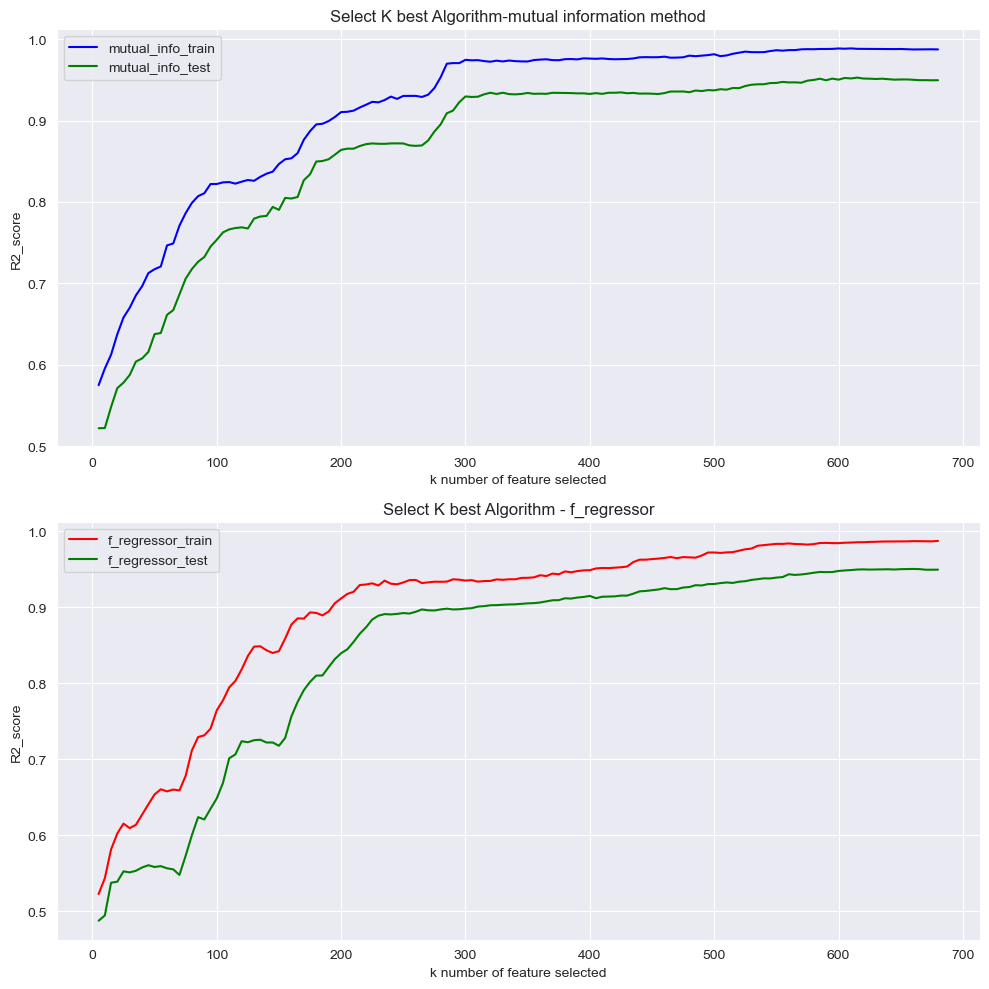

In [149]:
plt.figure(figsize=(10, 10))


plt.subplot(2, 1, 1)
plt.plot(num_features, np.array(mean_r2_mut_train), label='mutual_info_train',color='blue')
plt.plot(num_features, np.array(mean_r2_mut_test), label='mutual_info_test', color='green')
plt.title('Select K best Algorithm-mutual information method')
plt.xlabel('k number of feature selected')
plt.ylabel('R2_score')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(num_features, np.array(mean_r2_f_train), label='f_regressor_train', color='red')
plt.plot(num_features, np.array(mean_r2_f_test), label='f_regressor_test', color='green')
plt.title('Select K best Algorithm - f_regressor')
plt.xlabel('k number of feature selected')
plt.ylabel('R2_score')
plt.legend()

plt.tight_layout()

plt.show()

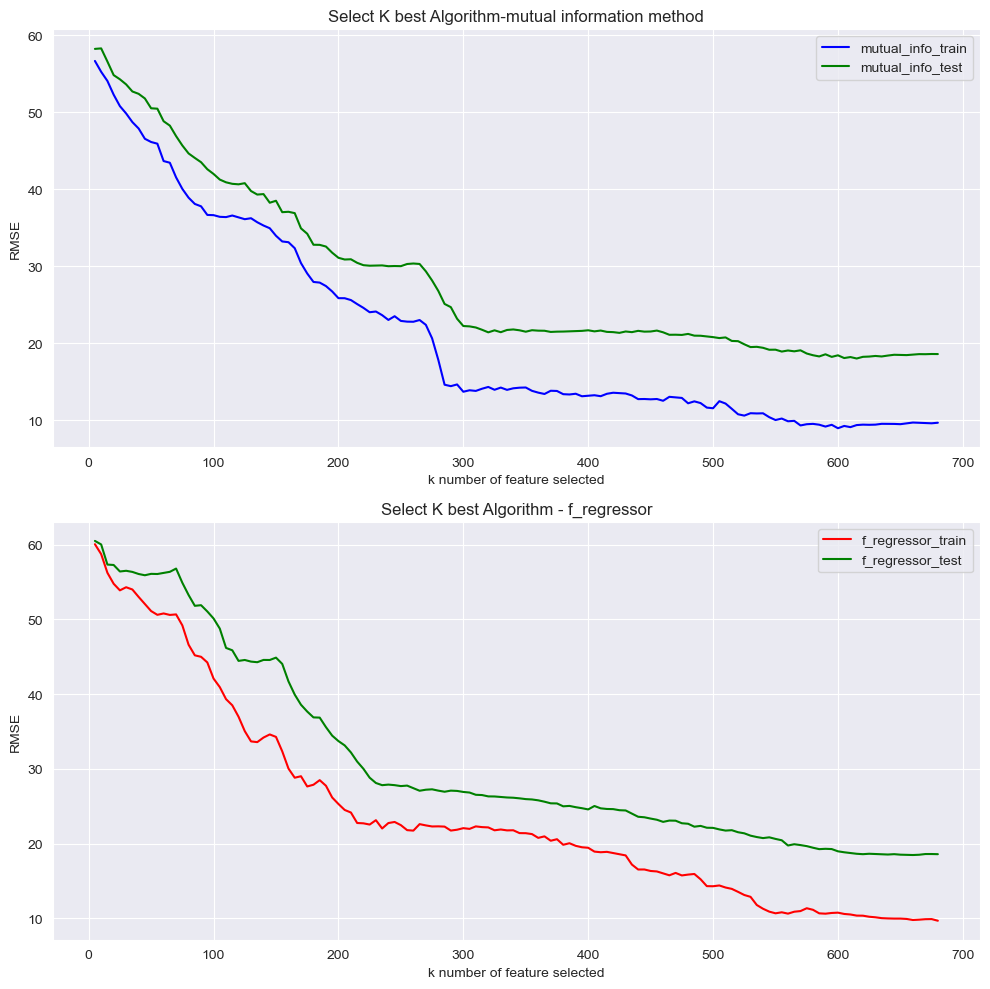

In [150]:
plt.figure(figsize=(10, 10))


plt.subplot(2, 1, 1)
plt.plot(num_features, np.array(mean_rmse_mut_train), label='mutual_info_train',color='blue')
plt.plot(num_features, np.array(mean_rmse_mut_test), label='mutual_info_test', color='green')
plt.title('Select K best Algorithm-mutual information method')
plt.xlabel('k number of feature selected')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(num_features, np.array(mean_rmse_f_train), label='f_regressor_train', color='red')
plt.plot(num_features, np.array(mean_rmse_f_test), label='f_regressor_test', color='green')
plt.title('Select K best Algorithm - f_regressor')
plt.xlabel('k number of feature selected')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()

plt.show()

In [23]:
from sklearn.linear_model import LassoLarsCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import RepeatedKFold, cross_val_score

cv_lasso = RepeatedKFold(n_splits=9, n_repeats=100)
k_320_best = SelectKBest(score_func=mutual_info_regression, k=310)
X_new_train = k_320_best.fit_transform(X,y)

reg = LassoLarsCV(cv=cv_lasso,n_jobs=-1).fit(X_new_train,y)
print(f'r2 score: {reg.score(X_new_train,y)}')
X


r2 score: 0.9513753531212632


,320,321,322,323,324,325,326,327,328,329,...,991,992,993,994,995,996,997,998,999,1000
0,0.387,0.390,0.398,0.406,0.416,0.428,0.440,0.446,0.453,0.457,...,0.188,0.186,0.185,0.183,0.182,0.181,0.179,0.178,0.177,0.176
1,0.380,0.386,0.394,0.401,0.411,0.423,0.434,0.437,0.444,0.446,...,0.298,0.295,0.293,0.290,0.288,0.286,0.283,0.281,0.279,0.277
2,0.375,0.380,0.389,0.395,0.406,0.417,0.427,0.432,0.437,0.438,...,0.362,0.359,0.357,0.354,0.352,0.349,0.346,0.344,0.341,0.339
3,0.303,0.311,0.319,0.326,0.337,0.349,0.362,0.366,0.373,0.377,...,0.362,0.359,0.357,0.354,0.351,0.348,0.346,0.344,0.341,0.339
4,0.306,0.313,0.322,0.329,0.341,0.353,0.365,0.369,0.376,0.379,...,0.371,0.368,0.366,0.363,0.360,0.357,0.354,0.352,0.350,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.237,0.240,0.248,0.255,0.266,0.278,0.296,0.302,0.316,0.325,...,0.363,0.360,0.357,0.354,0.351,0.347,0.344,0.341,0.338,0.336
195,0.245,0.250,0.259,0.264,0.278,0.292,0.309,0.317,0.330,0.340,...,0.351,0.348,0.345,0.341,0.338,0.334,0.331,0.328,0.325,0.323
196,0.262,0.266,0.275,0.283,0.296,0.311,0.328,0.334,0.348,0.358,...,0.320,0.316,0.314,0.310,0.308,0.304,0.301,0.298,0.295,0.293
197,0.260,0.266,0.274,0.282,0.296,0.309,0.328,0.336,0.349,0.359,...,0.307,0.303,0.300,0.297,0.294,0.290,0.288,0.285,0.282,0.280


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
coefs = sc.fit_transform(reg.coef_.reshape(-1,1))
coefs = coefs.reshape((-1,))


In [11]:
is_selected = k_320_best.get_support()
num_all_features = [i for i in range(320, 1001)]
counter_reg = 0
arr_fig = []
for i in range(len(is_selected)):
    if is_selected[i]:
        arr_fig.append(coefs[counter_reg])
        counter_reg += 1
    else:
        arr_fig.append(0)
arr_fig = np.array(arr_fig)
print(arr_fig.shape)


(681,)


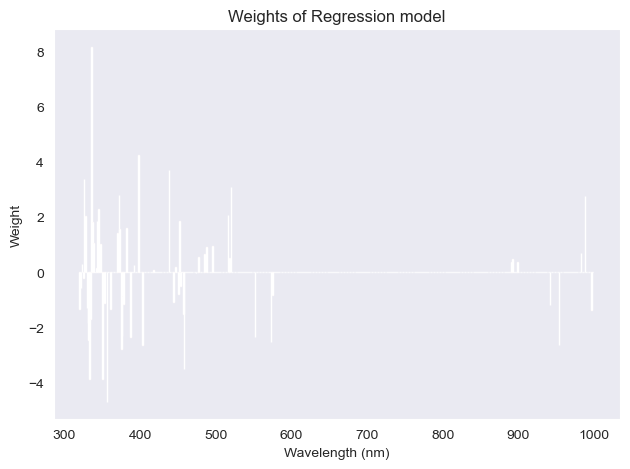

In [12]:
plt.bar(num_all_features,arr_fig, color='red')
plt.title('Weights of Regression model')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Weight')
plt.grid()

plt.tight_layout()

plt.show()

In [14]:
from sklearn.model_selection import cross_validate
X_new_test = k_320_best.transform(X)
results_mut = []
scores_mut = cross_validate(reg, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1,return_train_score=True)
print(np.mean(scores_mut['test_score']))
#print(' %.3f (%.3f)' % ( np.mean(scores_mut), np.std(scores_mut)))

NameError: name 'cv' is not defined

# Using RFECV and Random Forest Regressor for feature selection


In [24]:
from numpy.linalg import norm
y_pred = reg.predict(X_new_train)

LOD = (3.3 * np.std(y_pred)) / norm(reg.coef_)
LOD

0.017253277539525786